In [12]:
from neuron_groups import *
from brian2 import *
import numpy as np

izhikevich_equations = '''
  dv / dt = (0.04 / (mV * ms)) * (v ** 2) + (5 / ms) * v + 140 * mV /ms - u + I : volt
  du / dt = a * (b * v - u) : volt / second
  I : volt / second
  rnd : 1
  a : 1 / second
  b : 1 / second
  c : volt
  d : volt / second
'''

reset_equations = '''
  v=c
  u=u+d
'''

Vt = 30 * mV
threshold_equation = 'v >= Vt'


In [179]:
plt.rcParams.update({
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
})

In [131]:

N = 2
G = NeuronGroup(N,
    izhikevich_equations,
    threshold=threshold_equation,
    reset=reset_equations,
    method='rk4'
)
G.rnd = np.linspace(0, 1, N)
#G.rnd = [0.0, 0.88, 1.0]
G.a = 0.02/ms
G.b = 0.2/ms
G.c = '(-65 + 15 * (rnd ** 2)) * mV'
G.d = '(8 - 6 * (rnd ** 2)) * mV / ms'
G.I = 5*mV/ms
M = StateMonitor(G, 'v', record=True)
run(300*ms)

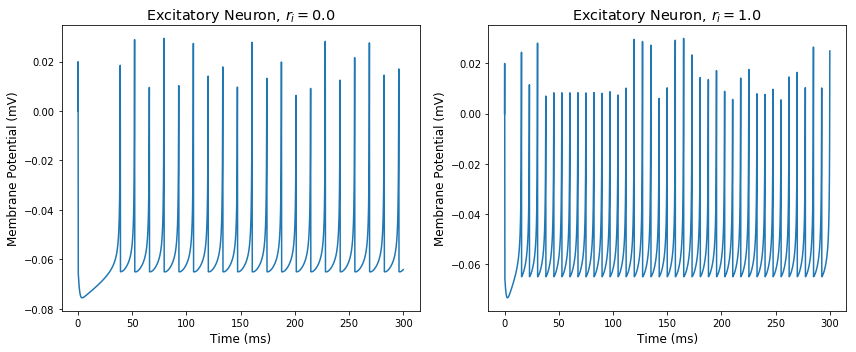

In [180]:
plt.figure(figsize=(12, 5))
for i in range(N):
    plt.subplot(1,N,i+1)
    plt.title(r'Excitatory Neuron, $r_i = {}$'.format(G.rnd[i]))
    plt.ylabel('Membrane Potential (mV)')
    plt.xlabel('Time (ms)')
    plt.plot(M.t/ms, M.v[i])
plt.tight_layout()
plt.savefig('figures/excitatory_neurons_variability.png')
plt.show()

In [167]:

N = 2
G = NeuronGroup(N,
    izhikevich_equations,
    threshold=threshold_equation,
    reset=reset_equations,
    method='rk4'
)
G.rnd = np.linspace(0, 1, N)
#G.rnd = 'rand()'
G.a = '(0.02 + 0.08 * rnd) / ms'
G.b = '(0.25 - 0.05 * rnd) / ms'
G.c = -65 * mV
G.d = 2 * mV / ms
G.I = 10*mV/ms
G.v = 0*mV
M = StateMonitor(G, 'v', record=True)
run(300*ms)

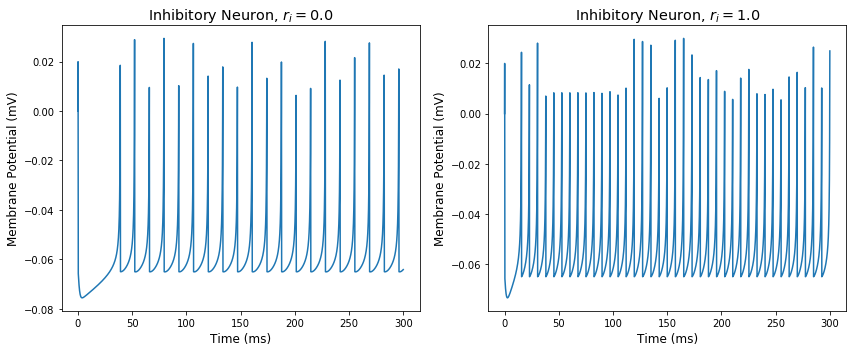

In [181]:
plt.figure(figsize=(12, 5))
for i in range(N):
    plt.subplot(1,2,i+1)
    plt.title(r'Inhibitory Neuron, $r_i = {}$'.format(G.rnd[i]))
    plt.ylabel('Membrane Potential (mV)')
    plt.xlabel('Time (ms)')
    plt.plot(M.t/ms, M.v[i])
plt.tight_layout()
plt.savefig('figures/inhibitory_neurons_variability.png')
plt.show()